In [172]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import pkg_resources
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
model_families = [
    ['wiki_cnn_v3_100', 'wiki_cnn_v3_101', 'wiki_cnn_v3_102'],
    ['wiki_debias_cnn_v3_100', 'wiki_debias_cnn_v3_101', 'wiki_debias_cnn_v3_102'],
]

In [174]:
# Read the scored data into DataFrame
df = pd.read_csv('eval_datasets/bias_madlibs_77k_scored.csv')

In [175]:
# Add columns for each subgroup.
f = open('bias_madlibs_data/adjectives_people.txt', 'r')
terms = [line.strip() for line in f]
model_bias_analysis.add_subgroup_columns_from_text(df, 'text', terms)

In [176]:
eq_diff = model_bias_analysis.per_subgroup_auc_diff_from_overall(df, terms, model_families, squared_error=True)
# sort to guarantee deterministic output
eq_diff.sort_values(by=['model_family'], inplace=True)
eq_diff.reset_index(drop=True, inplace=True)

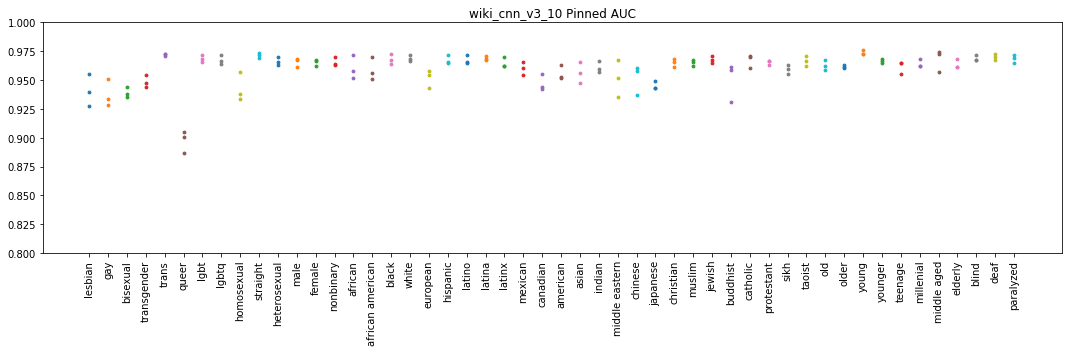

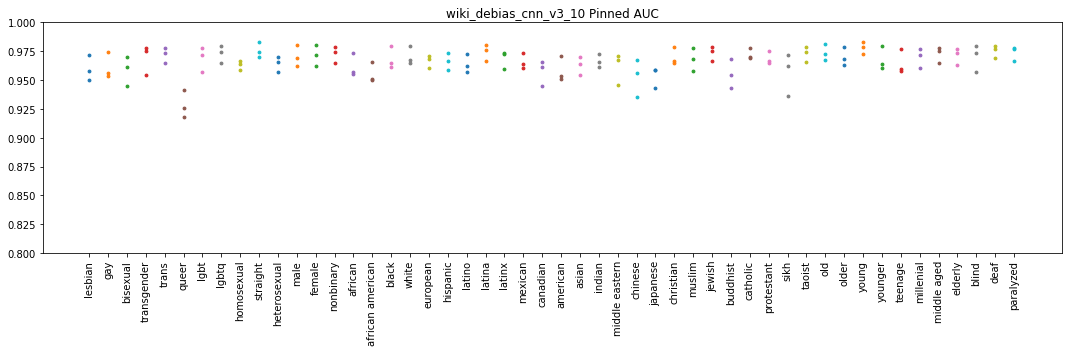

In [177]:
pinned_auc_results = model_bias_analysis.per_subgroup_aucs(df, terms, model_families, 'label')
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_aucs',
        title=name + ' Pinned AUC',
        y_lim=(0.8, 1.0))

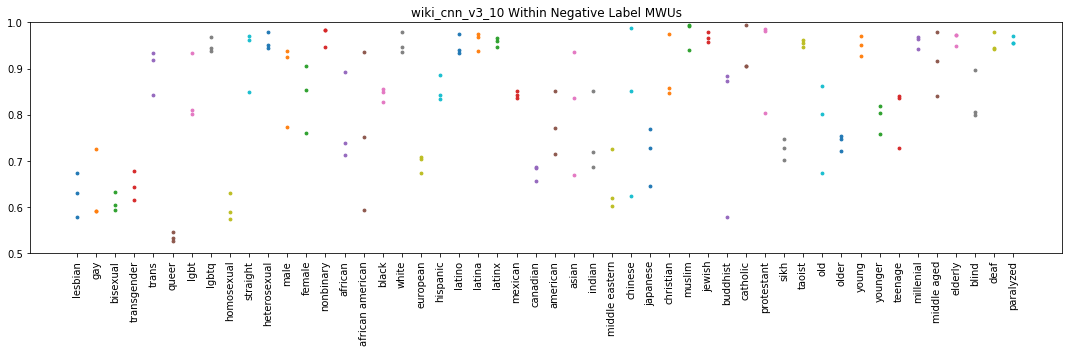

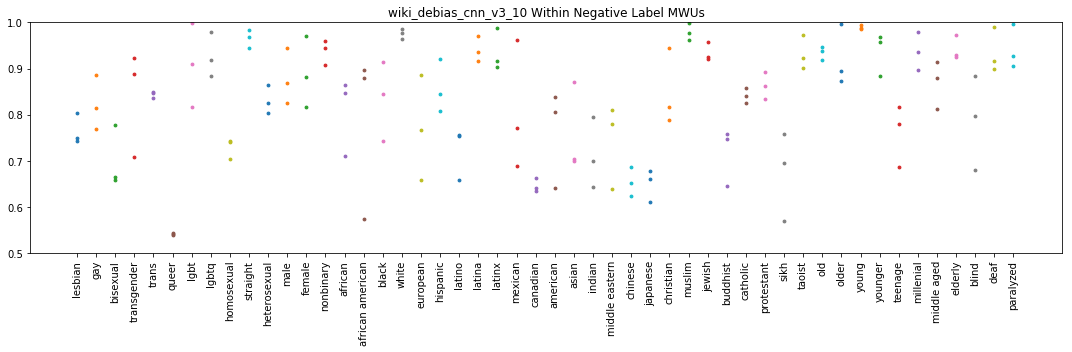

In [178]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_within_negative_label_mwus',
        title=name + ' Within Negative Label MWUs',
        y_lim=(0.5, 1.0))

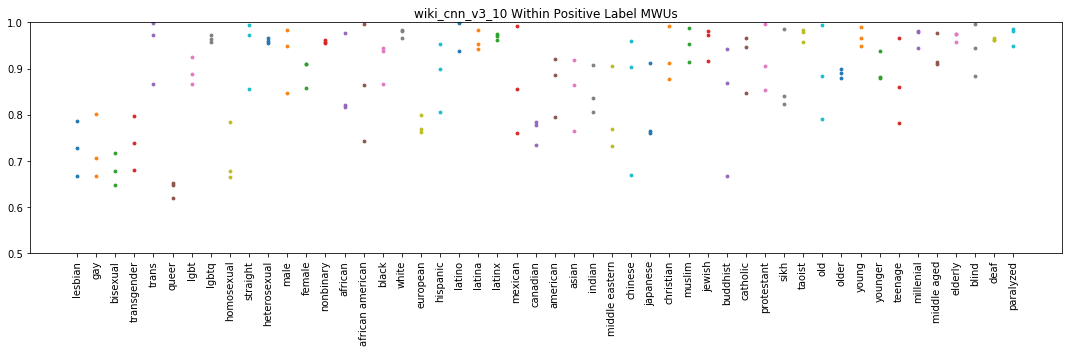

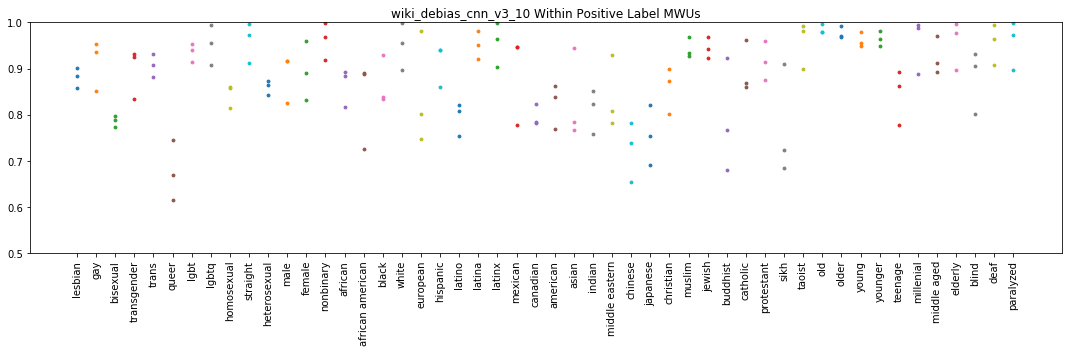

In [179]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_within_positive_label_mwus',
        title=name + ' Within Positive Label MWUs',
        y_lim=(0.5, 1.0))

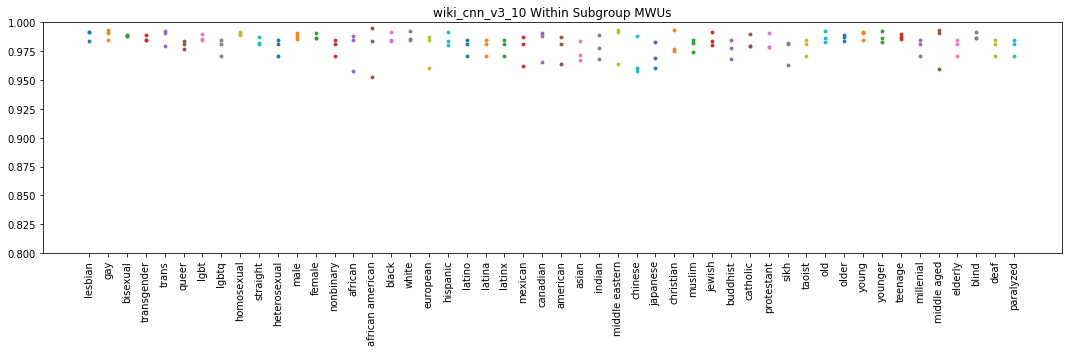

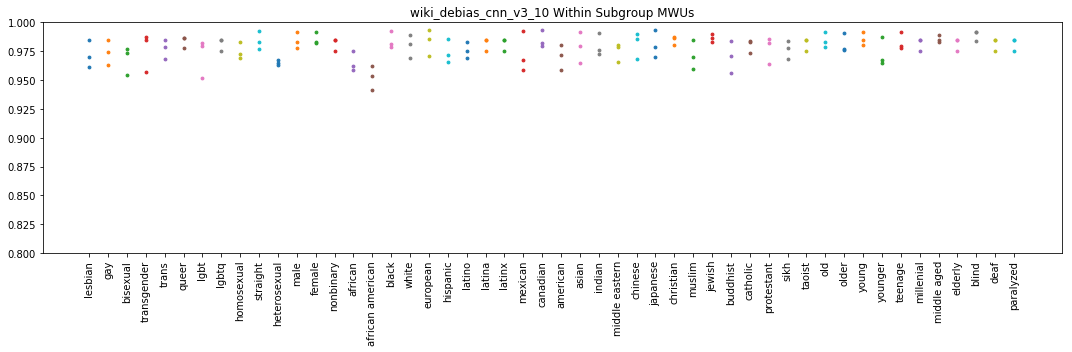

In [180]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_within_subgroup_mwus',
        title=name + ' Within Subgroup MWUs',
        y_lim=(0.8, 1.0))

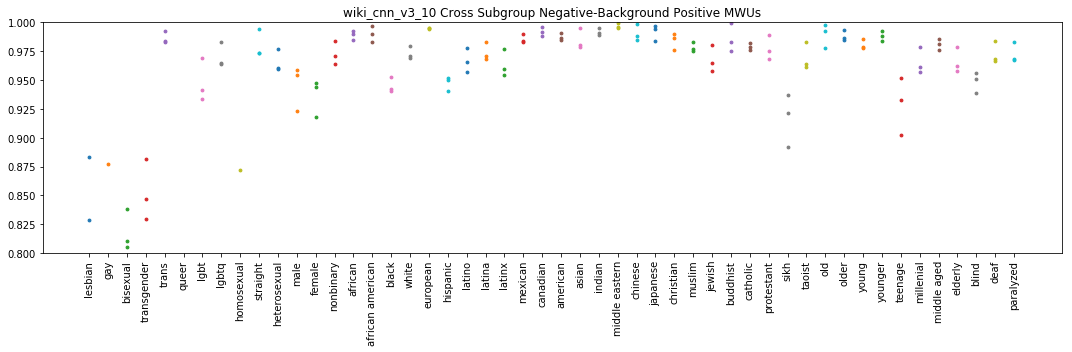

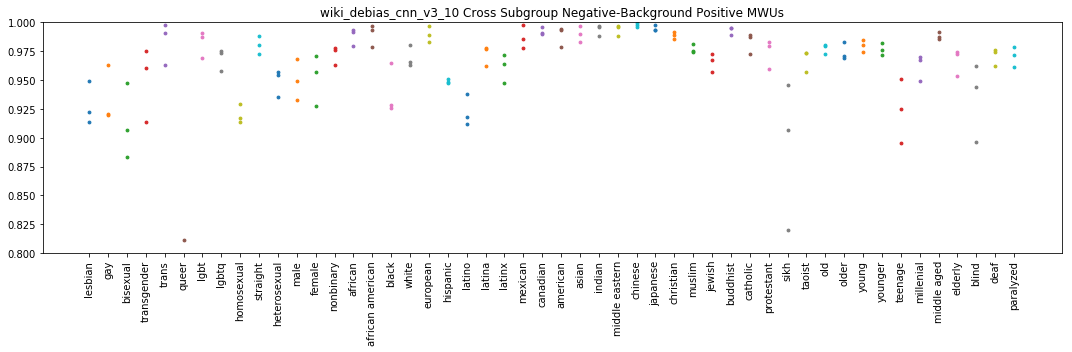

In [181]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_cross_subgroup_negative_mwus',
        title=name + ' Cross Subgroup Negative-Background Positive MWUs',
        y_lim=(0.8, 1.0))

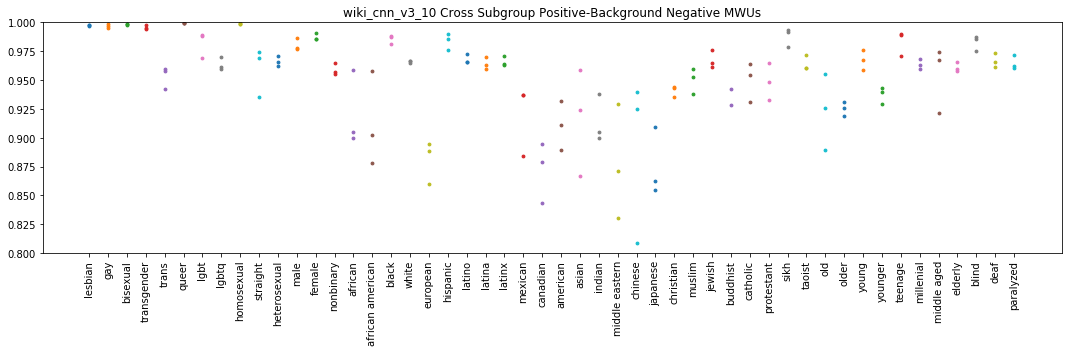

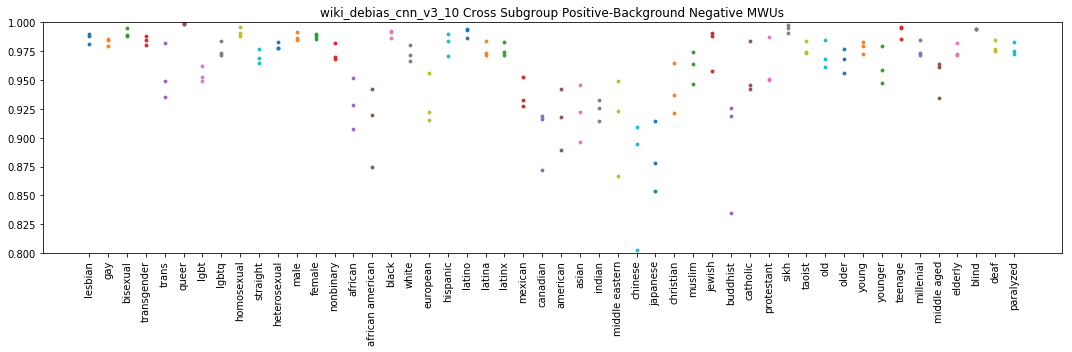

In [182]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_cross_subgroup_positive_mwus',
        title=name + ' Cross Subgroup Positive-Background Negative MWUs',
        y_lim=(0.8, 1.0))